In [110]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import matplotlib.pyplot as plt

# Country-level Analysis

## Load Date from JHU Dataset

In [111]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

In [112]:
dates = df_confirmed.columns.values.tolist()[4:]
df_confirmed = pd.melt(df_confirmed, id_vars=['Province/State','Country/Region','Lat','Long'], value_vars= dates)
df_deaths = pd.melt(df_deaths, id_vars=['Province/State','Country/Region','Lat','Long'], value_vars= dates)
df_recovered = pd.melt(df_recovered, id_vars=['Province/State','Country/Region','Lat','Long'], value_vars= dates)

In [113]:
df_confirmed = df_confirmed.rename(columns={'Country/Region':'Country_Region','Province/State':'Province_State','variable': 'Date','value':'Confirmed'})
df_deaths = df_deaths.rename(columns={'Country/Region':'Country_Region','Province/State':'Province_State','variable': 'Date','value':'Deaths'})
df_recovered = df_recovered.rename(columns={'Country/Region':'Country_Region','Province/State':'Province_State','variable': 'Date','value':'Recovered'})

## Prepare dataset
### China

In [114]:
def agg_China(df,column):    
    agg_China = pd.DataFrame(df[df['Country_Region'] == 'China'].groupby('Date')[column].sum(),columns = [column])
    agg_China = agg_China.reset_index(drop = False)
    df_China = df[df['Country_Region'] == 'China']
    df_China = df_China.merge(agg_China, left_on = 'Date', right_on = 'Date')
    return df_China

In [115]:
df_confirmed_China = agg_China(df_confirmed,'Confirmed')
df_deaths_China = agg_China(df_deaths,'Deaths')
df_recovered_China = agg_China(df_recovered,'Recovered')

In [116]:
df_confirmed_China = df_confirmed_China[['Country_Region','Date','Confirmed_y']]
df_confirmed_China = df_confirmed_China.drop_duplicates()
df_confirmed_China = df_confirmed_China.rename(columns = {'Confirmed_y':'Confirmed'}).reset_index(drop = True)

df_deaths_China = df_deaths_China[['Country_Region','Date','Deaths_y']]
df_deaths_China = df_deaths_China.drop_duplicates()
df_deaths_China = df_deaths_China.rename(columns = {'Deaths_y':'Deaths'}).reset_index(drop = True)

df_recovered_China = df_recovered_China[['Country_Region','Date','Recovered_y']]
df_recovered_China = df_recovered_China.drop_duplicates()
df_recovered_China = df_recovered_China.rename(columns = {'Recovered_y':'Recovered'}).reset_index(drop = True)

In [117]:
df_deaths_China = pd.DataFrame(df_deaths_China['Deaths'], columns = ['Deaths'])
df_recovered_China = pd.DataFrame(df_recovered_China['Recovered'], columns = ['Recovered'])
df_China = df_confirmed_China.merge(df_deaths_China, left_index = True, right_index = True)
df_China = df_China.merge(df_recovered_China, left_index = True, right_index = True)

### US

In [118]:
df_confirmed_US = df_confirmed[df_confirmed['Country_Region'] == 'US']
df_confirmed_US = df_confirmed_US[['Country_Region','Date','Confirmed']].reset_index(drop = True)

df_deaths_US = df_deaths[df_confirmed['Country_Region'] == 'US']
df_deaths_US = df_deaths_US[['Country_Region','Date','Deaths']].reset_index(drop = True)

df_recovered_US = df_recovered[df_recovered['Country_Region'] == 'US']
df_recovered_US = df_recovered_US[['Country_Region','Date','Recovered']].reset_index(drop = True)

In [119]:
df_deaths_US = pd.DataFrame(df_deaths_US['Deaths'], columns = ['Deaths'])
df_recovered_US = pd.DataFrame(df_recovered_US['Recovered'], columns = ['Recovered'])
df_US = df_confirmed_US.merge(df_deaths_US, left_index = True, right_index = True)
df_US = df_US.merge(df_recovered_US, left_index = True, right_index = True)

### Italy

In [120]:
df_confirmed_Italy = df_confirmed[df_confirmed['Country_Region'] == 'Italy']
df_confirmed_Italy = df_confirmed_Italy[['Country_Region','Date','Confirmed']].reset_index(drop = True)

df_deaths_Italy = df_deaths[df_confirmed['Country_Region'] == 'Italy']
df_deaths_Italy = df_deaths_Italy[['Country_Region','Date','Deaths']].reset_index(drop = True)

df_recovered_Italy = df_recovered[df_recovered['Country_Region'] == 'Italy']
df_recovered_Italy = df_recovered_Italy[['Country_Region','Date','Recovered']].reset_index(drop = True)

In [121]:
df_deaths_Italy = pd.DataFrame(df_deaths_Italy['Deaths'], columns = ['Deaths'])
df_recovered_Italy = pd.DataFrame(df_recovered_Italy['Recovered'], columns = ['Recovered'])
df_Italy = df_confirmed_Italy.merge(df_deaths_Italy, left_index = True, right_index = True)
df_Italy = df_Italy.merge(df_recovered_Italy, left_index = True, right_index = True)

In [122]:
# Add the number of new cases for each day
df_China["Confirmed_new"] = df_China["Confirmed"].diff()
df_China["Deaths_new"] = df_China["Deaths"].diff()
df_China["Recovered_new"] = df_China["Recovered"].diff()

df_Italy["Confirmed_new"] = df_Italy["Confirmed"].diff()
df_Italy["Deaths_new"] = df_Italy["Deaths"].diff()
df_Italy["Recovered_new"] = df_Italy["Recovered"].diff()

df_US["Confirmed_new"] = df_US["Confirmed"].diff()
df_US["Deaths_new"] = df_US["Deaths"].diff()
df_US["Recovered_new"] = df_US["Recovered"].diff()

In [123]:
# Define function to get the Incremental ratio
def get_ratio(series_input): 
    data = np.array([0])  
    new_row = pd.Series(data)  
    numerator = series_input.diff()
    denominator = pd.concat([new_row, series_input[:]]).reset_index(drop = True).iloc[:-1]
    return numerator/denominator

In [124]:
# Add the Incremental ratio for new cases for each day
df_China["Confirmed_Incremental_Rate"] = get_ratio(df_China["Confirmed"])
df_China["Deaths_Incremental_Rate"] = get_ratio(df_China["Deaths"])
df_China["Recovered_Incremental_Rate"] = get_ratio(df_China["Recovered"])

df_Italy["Confirmed_Incremental_Rate"] = get_ratio(df_Italy["Confirmed"])
df_Italy["Deaths_Incremental_Rate"] = get_ratio(df_Italy["Deaths"])
df_Italy["Recovered_Incremental_Rate"] = get_ratio(df_Italy["Recovered"])

df_US["Confirmed_Incremental_Rate"] = get_ratio(df_US["Confirmed"])
df_US["Deaths_Incremental_Rate"] = get_ratio(df_US["Deaths"])
df_US["Recovered_Incremental_Rate"] = get_ratio(df_US["Recovered"])

In [125]:
df_country = pd.concat([df_China,df_US,df_Italy], axis=0) 

In [126]:
# df_country.to_csv('df_country.csv')

In [127]:
df_country.head()

,Country_Region,Date,Confirmed,Deaths,Recovered,Confirmed_new,Deaths_new,Recovered_new,Confirmed_Incremental_Rate,Deaths_Incremental_Rate,Recovered_Incremental_Rate
0,China,1/22/20,548,17,28,NaN,NaN,NaN,NaN,NaN,NaN
1,China,1/23/20,643,18,30,95.0,1.0,2.0,0.173358,0.058824,0.071429
2,China,1/24/20,920,26,36,277.0,8.0,6.0,0.430793,0.444444,0.200000
3,China,1/25/20,1406,42,39,486.0,16.0,3.0,0.528261,0.615385,0.083333
4,China,1/26/20,2075,56,49,669.0,14.0,10.0,0.475818,0.333333,0.256410


## Visualization

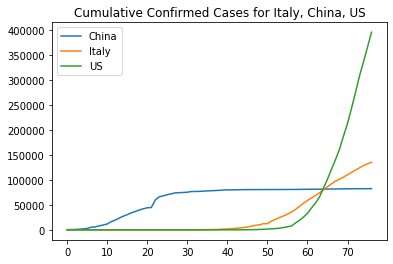

In [135]:
# Cumulative Confirmed Cases
plt.title("Cumulative Confirmed Cases for Italy, China, US")
plt.plot(df_China["Confirmed"])
plt.plot(df_Italy["Confirmed"])
plt.plot(df_US["Confirmed"])
plt.legend(['China','Italy',"US"], loc='upper left')


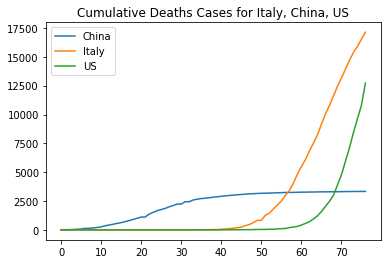

In [129]:
# Cumulative Death Cases
plt.title("Cumulative Deaths Cases for Italy, China, US")
plt.plot(df_China["Deaths"])
plt.plot(df_Italy["Deaths"])
plt.plot(df_US["Deaths"])
plt.legend(['China','Italy',"US"], loc='upper left')


In [147]:
viz_x_inverval = int(len(df_US["Date"][30:])/5)

In [166]:
viz_x_date_pos = [30+ i*viz_x_inverval for i in range(6)]

In [167]:
df_US["Date"].iloc[viz_x_date_pos]

30    2/21/20
39     3/1/20
48    3/10/20
57    3/19/20
66    3/28/20
75     4/6/20
Name: Date, dtype: object

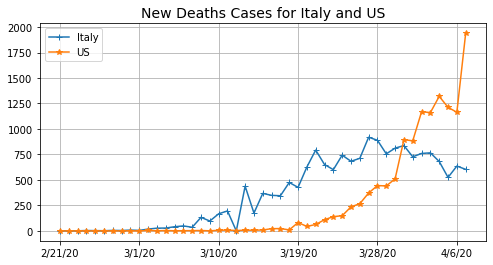

In [185]:
# New Death Cases for Each Day
plt.figure(figsize=(8,4))
plt.title("New Deaths Cases for Italy and US",fontsize = 14)
plt.plot(df_Italy["Deaths_new"][30:],"-+")
plt.plot(df_US["Deaths_new"][30:],"-*")
plt.xticks(viz_x_date_pos,df_US["Date"].iloc[viz_x_date_pos])
plt.legend(["Italy","US"], loc='upper left')
plt.grid()

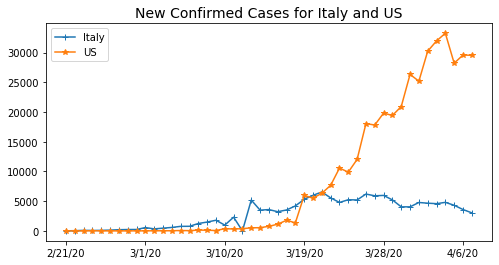

In [188]:
# New Confirmed Cases for Each Day
plt.figure(figsize=(8,4))

plt.title("New Confirmed Cases for Italy and US",fontsize = 14)
# plt.plot(df_China["Confirmed_new"])
plt.plot(df_Italy["Confirmed_new"][30:],"-+")
plt.plot(df_US["Confirmed_new"][30:],"-*")
plt.xticks(viz_x_date_pos,df_US["Date"].iloc[viz_x_date_pos])

plt.legend(['Italy',"US"], loc='upper left')


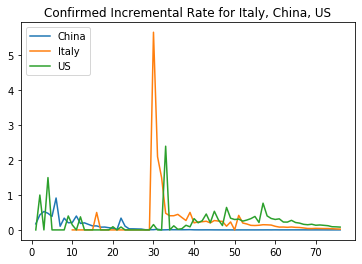

In [131]:
# Confirmed Incremental Rate
plt.title("Confirmed Incremental Rate for Italy, China, US")
plt.plot(df_China["Confirmed_Incremental_Rate"])
plt.plot(df_Italy["Confirmed_Incremental_Rate"])
plt.plot(df_US["Confirmed_Incremental_Rate"])
plt.legend(['China','Italy',"US"], loc='upper left')
